In [ ]:
%%shell
jupyter nbconvert --to html ///content/Preethi_GT__ENews_Express_Learner_Notebook_Full_Code_Version.ipynb

[NbConvertApp] Converting notebook ///content/Preethi_GT__ENews_Express_Learner_Notebook_Full_Code_Version.ipynb to html
[NbConvertApp] Writing 1028710 bytes to ///content/Preethi_GT__ENews_Express_Learner_Notebook_Full_Code_Version.html


# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

### **Business Context**
With many emerging technologies, it offers excellent opportunities to publish global news and content daily. These contents are presented to the users by capturing the information from the online databases using various software. Similarly, an online news portal, E-news Express, aims to expand its business by gaining new subscribers. The company plans to analyze the visitor's interest to offer a better user experience and engagement. The executives at the company are opinionated that there is a decline in new monthly subscriptions than last year. The current webpage is not designed well to recommend relevant content to keep the customers engaged long enough to decide to subscribe.
### **Problem Definition**
The company's design team has researched and created a new landing page with a contemporary outline & more relevant content compared to the old page. To test the effectiveness of the new landing page in gathering new subscribers, the Data Science team experimented by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Data has to be explored and statistical analysis has to be performed (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal.


### **Objective**

To determine the effectiveness of the new landing page in gathering new subscribers for the news portal , the following questions has to be answered.

Do the users spend more time on the new landing page than on the existing landing page?

Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Does the converted status depend on the preferred language?

Is the time spent on the new page the same for the different language users?

###**Data background and contents**
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - language chosen by the user to view the landing page

## Import all the necessary libraries

In [ ]:
# import the scipy and check the version to be sure that the version is above 1.6.1.
import scipy
scipy.__version__

'1.7.3'

In [ ]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Reading the Data into a DataFrame

In [ ]:
# Reading Data into a Dataframe from google drive
from google.colab import drive
drive.mount('/content/drive/')
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Notes/Project_2_ENews_Express/abtest.csv')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

**View first and last few rows of the dataset**

In [ ]:
# returns the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# returns the last 5 rows
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


**Observations**

Each row represents the interaction of users in the Control and Treatment group for the different versions of the landing page ( Old and New ).

**Shape of the Data**

In [ ]:
# Returns the number of rows and Columns present in the data
print("There are", df.shape[0], 'rows and', df.shape[1], "columns in the given data.")

There are 100 rows and 6 columns in the given data.


**Observations**

The DataFrame has 100 rows and 6 columns.

**Datatypes of the columns for dataset**

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


**Observations**

The dataset has 1 integer datatype, 4 object datatype, and 1 float data type.

The count of non-null values is the same for all columns, and it is also equal to the total row count of the data frame which indicates no missing data.

Memory usage is 4.8+ KB.

**Numerical summary statistics**

In [ ]:
# Returns Statistical summary of the data for Numerical Datatype
df.describe(exclude=[object]).T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


**Categorical summary statistics**

In [ ]:
# Returns Statistical summary of the data for object Datatype
df.describe(exclude=[np.number]).T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


**Observations**

**Time Spent on the Page:** On average, the time spent by the users on the page is 5.38 minutes. The minimum time spent is 0.19 minutes and the maximum time spent is 10.71 minutes. 75% of the people spent 7 or less than 7 minutes on a page. The time spent on the landing page is a continuous variable.

**Group:** The group has two unique values 'control' and the 'treatment'. Both values have an equal number of entries in the dataset.

**Landing Page:** The Landing page has two unique values 'old' and 'new' representing the old version of the landing page and the new version respectively. The unique values of the column have an equal number of entries in the dataset.

**Converted:** The conversion represents the user's status after they get converted to a subscriber of the news portal or not. The values include 'yes' or 'no' and there is a slight majority of people getting converted to subscribers after viewing the landing page.

**Language Preferred:** Users prefer to read the page in 3 different languages and the most preferred language by the users is Spanish.

**Missing Values**

In [ ]:
# Returns the sum of  missing or Null values in a dataset for each column
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

**Observations**

There are no missing values in the dataset and requires no treatment.

**Duplicate Entries**

In [ ]:
# Returns duplicate entries in dataset
df.duplicated().sum()

0

**Observations**

There are no duplicate values in the dataset.

In [ ]:
# Returns unique values for all categorical Columns
column_list = list(df.columns[[1,2,4,5]])
for column_list in column_list:
  print(column_list, ' : ',df[column_list].unique())

group  :  ['control' 'treatment']
landing_page  :  ['old' 'new']
converted  :  ['no' 'yes']
language_preferred  :  ['Spanish' 'English' 'French']


**Observations**

The unique values of categorical columns are

Group( group ) : Control and Treatment

Landing Page( landing_page ) : old and new

Converted status( converted ) : no and yes

Language preferred( language_preferred ) : Spanish , English and French

### Univariate Analysis

**Time spent on the page**

In [ ]:
print('The minimum time spent on the landing page is ',df['time_spent_on_the_page'].min(),'minutes and the maximum time spent on the landing page is',df['time_spent_on_the_page'].max(),'minutes')

The minimum time spent on the landing page is  0.19 minutes and the maximum time spent on the landing page is 10.71 minutes


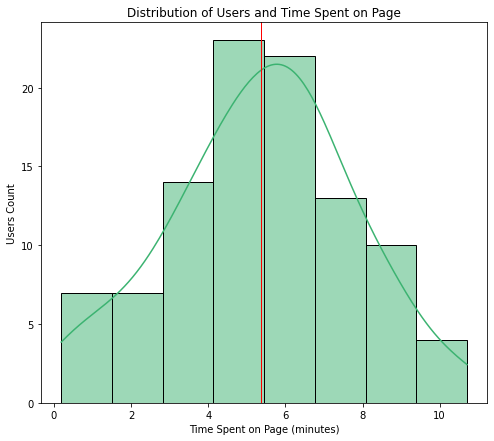

In [ ]:
plt.figure(figsize=(8,7));
sns.histplot(data=df,x='time_spent_on_the_page', kde = True,color='mediumseagreen')
plt.axvline(df['time_spent_on_the_page'].mean(), color='r', linewidth=1)
plt.title('Distribution of Users and Time Spent on Page')
plt.xlabel('Time Spent on Page (minutes)') 
plt.ylabel('Users Count') 
plt.show()

**Observations**

Time spent on the page is normally distributed across its mean of 5.37 minutes.

The range of time spent on the page varies from 11.4 seconds to 10.71 minutes.

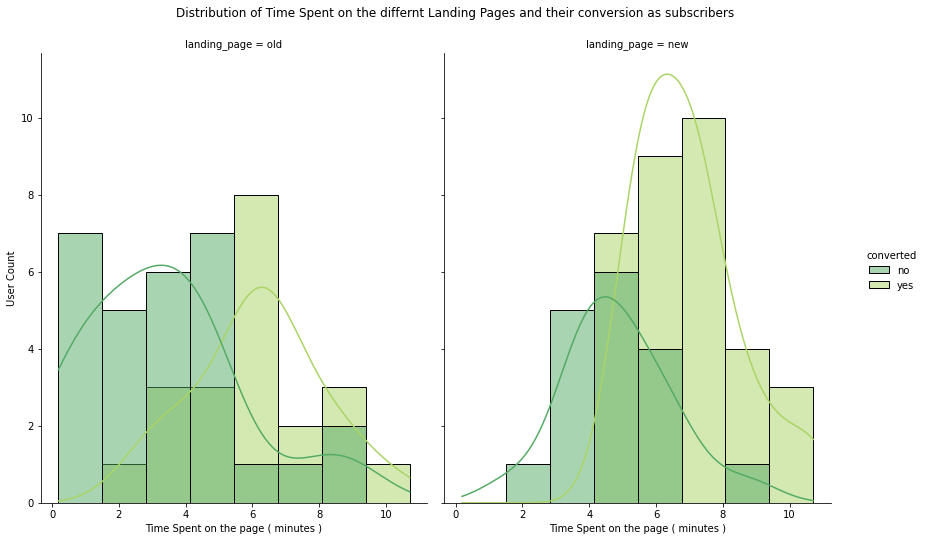

In [ ]:
import seaborn as sns
dplot=sns.displot(data=df, x='time_spent_on_the_page', hue='converted', col='landing_page', kind='hist',
           palette='summer', kde=True)
dplot.fig.set_size_inches(13,8)
dplot.fig.subplots_adjust(top=0.9)
dplot.fig.suptitle('Distribution of Time Spent on the differnt Landing Pages and their conversion as subscribers')
dplot.set_xlabels('Time Spent on the page ( minutes )')
dplot.set_ylabels('User Count')
plt.show()

**Observations**

Users spending more time on the landing pages seems to change from visitors to subscribers.

There is a good increase in the time spent on the new landing page compared to the old page.

We also observe more visitors are converted to subscribers on the new landing page compared to the old landing page.


**Language Preferred**

In [ ]:
#Returns the unique count of each Language
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

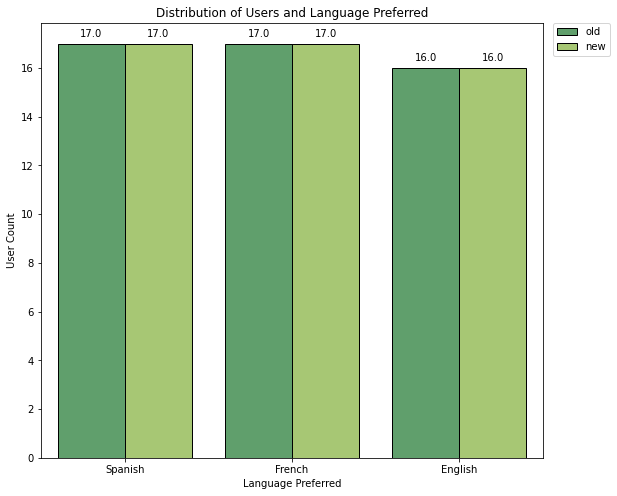

In [ ]:
plt.figure(figsize=(9, 8))
splot = sns.countplot(data=df, x ='language_preferred',hue='landing_page',palette='summer',order=df['language_preferred'].value_counts().index)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  p.set_edgecolor('black')
  p.set_linewidth(1)
plt.title("Distribution of Users and Language Preferred")
plt.xlabel('Language Preferred')
plt.ylabel('User Count')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

**Observations**

There are 3 unique languages(English, Spanish, and French) preferred by the users to read the old and new landing pages.

The sample includes an equal number of readers for English, Spanish, and French on old and new landing pages.

In [ ]:
# Returns the percentage of users who got converted and who did not get converted to subscribers for each language.
df.groupby(['language_preferred'])['converted'].value_counts(normalize=True)*100

language_preferred  converted
English             yes          65.625000
                    no           34.375000
French              no           55.882353
                    yes          44.117647
Spanish             yes          52.941176
                    no           47.058824
Name: converted, dtype: float64

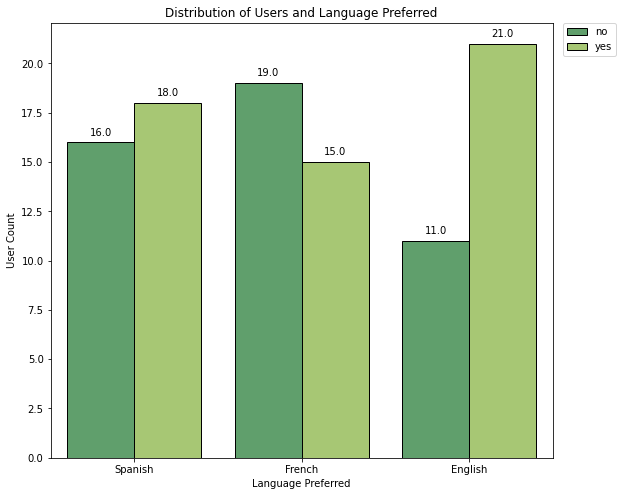

In [ ]:
plt.figure(figsize=(9, 8))
splot = sns.countplot(data=df, x ='language_preferred',hue='converted',palette='summer',order=df['language_preferred'].value_counts().index)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  p.set_edgecolor('black')
  p.set_linewidth(1)
plt.title("Distribution of Users and Language Preferred")
plt.xlabel('Language Preferred')
plt.ylabel('User Count')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

**Observation**

About 65% of visitors who read the landing page in English became subscribers followed by Spanish(52%) and by French (44%).





**Landing Page**

In [ ]:
# Returns the unique count for each landing page
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

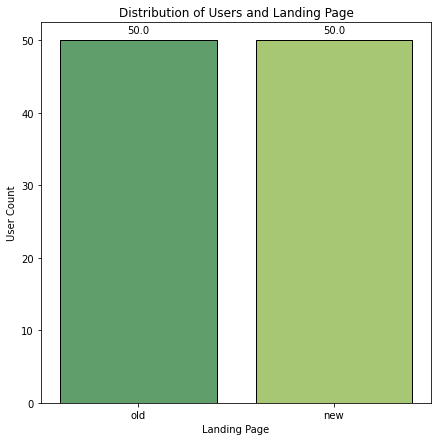

In [ ]:
plt.figure(figsize=(7,7))
splot = sns.countplot(data=df, x ='landing_page',palette='summer')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  p.set_edgecolor('black')
  p.set_linewidth(1)
plt.title("Distribution of Users and Landing Page")
plt.xlabel('Landing Page')
plt.ylabel('User Count')

plt.show()

**Observations**

There is an equal number of users chosen to read the two versions of the Landing pages.


In [ ]:
# Returns the number of users who got converted and who did not get converted in each of the landing pages.
df.groupby(['landing_page'])['converted'].value_counts(normalize=True)*100

landing_page  converted
new           yes          66.0
              no           34.0
old           no           58.0
              yes          42.0
Name: converted, dtype: float64

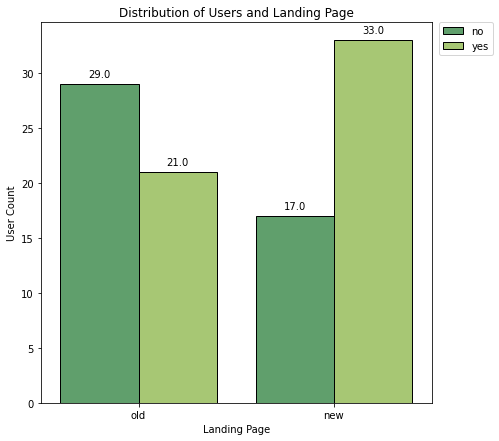

In [ ]:
plt.figure(figsize=(7,7))
splot = sns.countplot(data=df, x ='landing_page',hue='converted',palette='summer')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  p.set_edgecolor('black')
  p.set_linewidth(1)
plt.title("Distribution of Users and Landing Page")
plt.xlabel('Landing Page')
plt.ylabel('User Count')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

**Observations**

On comparing the number of users who got converted to subscribers, the New landing page has **66%** of its visitors turned into subscribers but the old landing page has only **42%** of them.

**Group**

In [ ]:
# Returns the unique count for each Group
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

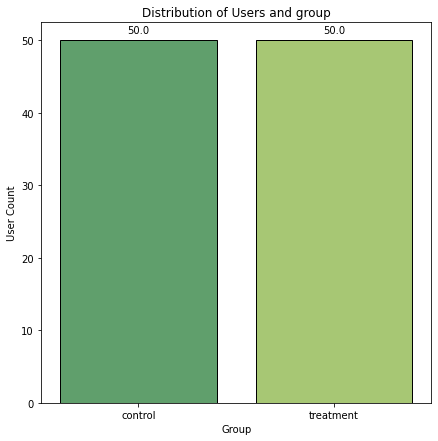

In [ ]:
plt.figure(figsize=(7,7))
splot = sns.countplot(data=df, x ='group',palette='summer')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  p.set_edgecolor('black')
  p.set_linewidth(1)
plt.title("Distribution of Users and group")
plt.xlabel('Group')
plt.ylabel('User Count')

plt.show()

**Observations**

There is an equal number of users chosen for the control group and treatment group.

In [ ]:
# Returns the number of users who got converted and who did not get converted in each of the groups
df.groupby(['group'])['converted'].value_counts(normalize=True)*100

group      converted
control    no           58.0
           yes          42.0
treatment  yes          66.0
           no           34.0
Name: converted, dtype: float64

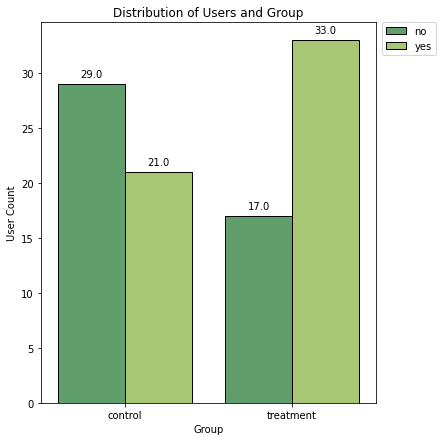

In [ ]:
plt.figure(figsize=(6, 7))
splot = sns.countplot(data=df, x ='group',hue='converted',palette='summer')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  p.set_edgecolor('black')
  p.set_linewidth(1)
plt.title("Distribution of Users and Group")
plt.xlabel('Group')
plt.ylabel('User Count')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

**Observation:**

It is observed that users of the Treatment group get converted to subscribers at a higher rate than the users of the control group. 

This is the expected result as the groups correspond to the different versions of landing pages and the results are similar to that of the landing page.

**Converted**

In [ ]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

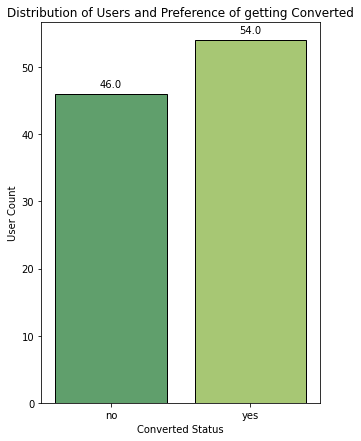

In [ ]:
plt.figure(figsize=(5, 7))
splot = sns.countplot(data=df, x ='converted',palette='summer')
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  p.set_edgecolor('black')
  p.set_linewidth(1)
plt.title("Distribution of Users and Preference of getting Converted")
plt.xlabel('Converted Status')
plt.ylabel('User Count')
plt.show()

**Observation**

The number of visitors who got converted to subscribers after reading the landing page is higher than the number of visitors who did not get converted to subscribers.


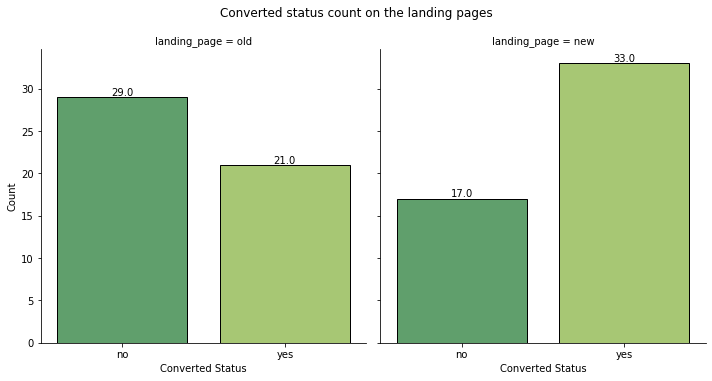

In [ ]:
import matplotlib.pyplot as plt

g = sns.catplot(data=df, x='converted', col='landing_page', kind='count', palette='summer',ci=None,edgecolor='black')

ax1 = g.axes[0][0]
ax2 = g.axes[0][1]

bars = ax1.patches
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom')

bars = ax2.patches
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom')

g.fig.suptitle("Converted status count on the landing pages", y=1.05)
g.set_xlabels("Converted Status")
g.set_ylabels("Count")

plt.show()


**Observation**

The number of visitors who got converted to subscribers after reading the new landing page is higher than the number of visitors who got converted to subscribers after reading the old landing page.

### Bivariate Analysis

**Landing Page vs Time Spent on the Page**

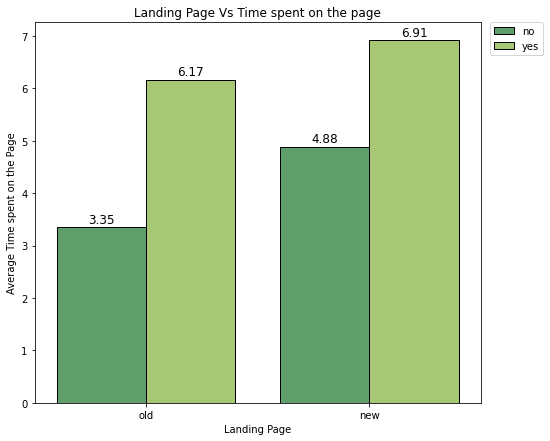

In [ ]:
plt.figure(figsize=(8,7)) 
bplot=sns.barplot(data=df, x='landing_page', y='time_spent_on_the_page',palette='summer',hue='converted',ci=None)
for bar in bplot.patches:
    bplot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    bar.set_edgecolor('black')
    bar.set_linewidth(1)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Landing Page Vs Time spent on the page')
plt.xlabel('Landing Page')
plt.ylabel('Average Time spent on the Page')
plt.show()

**Observations**

The average time spent by visitors who got converted to subscribers is around 6-7 minutes for both landing pages.

The average time spent by users who got converted to subscribers is higher than the average time spent by users who did not get converted to subscribers.



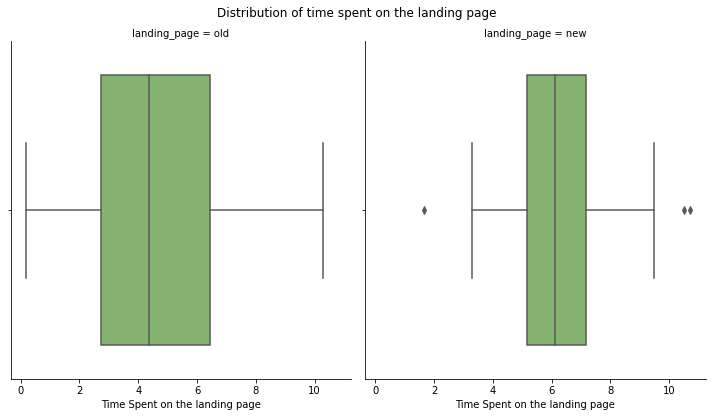

In [ ]:
import matplotlib.pyplot as plt
g = sns.catplot(data=df,x='time_spent_on_the_page',col='landing_page', kind='box', palette='summer',ci=None)
g.fig.set_size_inches(10, 6)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of time spent on the landing page')
g.set_xlabels('Time Spent on the landing page') 
plt.show()


**Observations**

The time spent on the old landing page is slightly right-skewed but has no outliers.

The time spent on a new landing page has few outliers but the area of the box plot is narrow indicating low variability or dispersion in the data. 


**Language Preferred vs Time Spent on the page**

In [ ]:
# Returns the Average time spent by the users in each preferred languages
df.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64

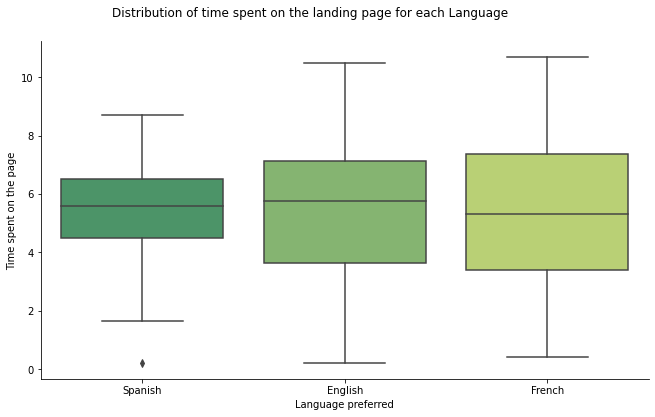

In [ ]:
import matplotlib.pyplot as plt
g = sns.catplot(data=df,x='language_preferred',y='time_spent_on_the_page', kind='box', palette='summer',ci=None)
g.fig.set_size_inches(10, 6)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of time spent on the landing page for each Language')
g.set_xlabels('Language preferred')
g.set_ylabels('Time spent on the page') 
plt.show()

**Observations**

The average time spent in all three languages is almost equal and lies between 5 minutes to 5.6 minutes.

Box plot corresponding to the Spanish language indicates the presence of outliers and its box plot area is narrowest indicating low variability in data.

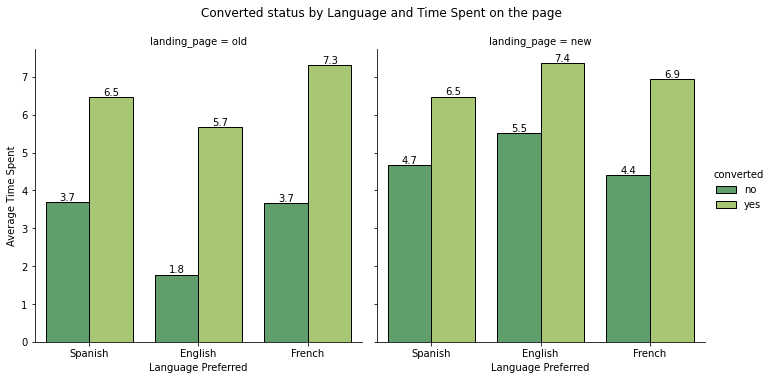

In [ ]:
import matplotlib.pyplot as plt

g = sns.catplot(data=df, x='language_preferred', y='time_spent_on_the_page', hue='converted', col='landing_page', kind='bar', palette='summer',ci=None,edgecolor='black')

ax1 = g.axes[0][0]
ax2 = g.axes[0][1]

bars = ax1.patches
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom')

bars = ax2.patches
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom')

g.fig.suptitle("Converted status by Language and Time Spent on the page", y=1.05)
g.set_xlabels("Language Preferred")
g.set_ylabels("Average Time Spent")

plt.show()


**Observations**

The average time spent by users who preferred to read in Spanish and who got converted to subscribers is around 6.5 minutes on both landing pages.

The average time spent (5.7 minutes) by users who preferred to read in English and who got converted to subscribers on the old page is a little low when compared to the average time spent(7.4 minutes)  by English readers and who got converted to subscribers on the new page.

The average time spent (7.3 minutes) by French users who got converted to subscribers on the old page is a little high when compared to the average time spent(6.9 minutes) by French users who got converted to subscribers on the new page.

In general, users of both landing pages who got converted to subscribers have their average time spent on the page high as compared to the users who did not subscribe.

**Converted Vs Time Spent on the Landing Page**

In [ ]:
# Returns the avarage time spent by the users who got converted to subscribers
df.groupby(['converted'])['time_spent_on_the_page'].mean()

converted
no     3.915870
yes    6.623148
Name: time_spent_on_the_page, dtype: float64

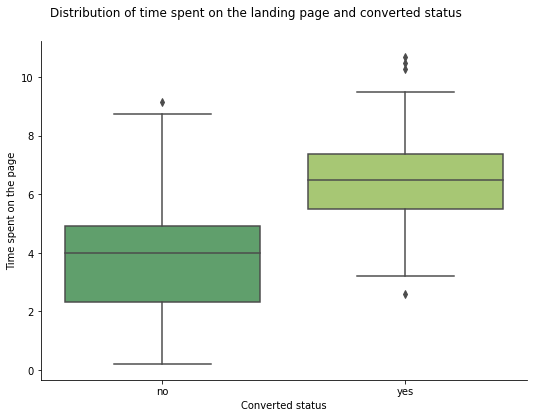

In [ ]:
import matplotlib.pyplot as plt
g = sns.catplot(data=df,x='converted',y='time_spent_on_the_page', kind='box', palette='summer',ci=None)
g.fig.set_size_inches(8, 6)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of time spent on the landing page and converted status')
g.set_xlabels('Converted status')
g.set_ylabels('Time spent on the page') 
plt.show()

**Observations**

The box plot for the users who got converted indicates a high average time spent on the page compared to the users who did not get converted to subscribers.

Box plots of both conversion status indicate presence of outliers.

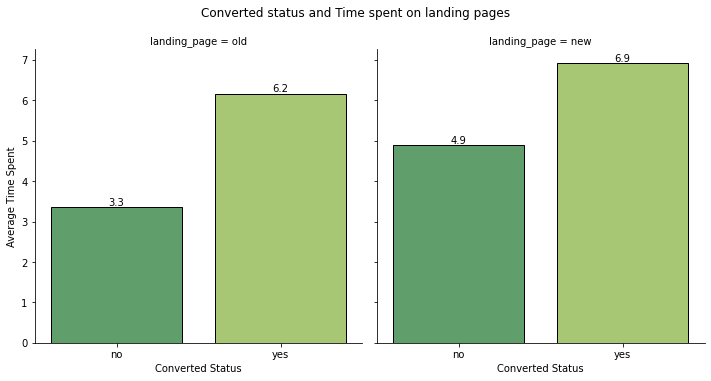

In [ ]:
import matplotlib.pyplot as plt

g = sns.catplot(data=df, x='converted', y='time_spent_on_the_page', col='landing_page', kind='bar', palette='summer',ci=None,edgecolor='black')

ax1 = g.axes[0][0]
ax2 = g.axes[0][1]

bars = ax1.patches
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom')

bars = ax2.patches
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom')

g.fig.suptitle("Converted status and Time spent on landing pages", y=1.05)
g.set_xlabels("Converted Status")
g.set_ylabels("Average Time Spent")

plt.show()


**Observations**

The average time spent by users who got converted to subscribers on the old page and the new page is around 6 to 7 minutes.

The average time spent by users who got converted to subscribers is high compared to those users who did not get converted.

**Langauge Preferred Vs Landing Page**

In [ ]:
# Returns the count of users converted and not converted for all preferred lanaguages in old and new landing pages
df.groupby(['landing_page', 'language_preferred', 'converted']).size().reset_index(name='count')

,landing_page,language_preferred,converted,count
0,new,English,no,6
1,new,English,yes,10
2,new,French,no,5
3,new,French,yes,12
4,new,Spanish,no,6
5,new,Spanish,yes,11
6,old,English,no,5
7,old,English,yes,11
8,old,French,no,14
9,old,French,yes,3


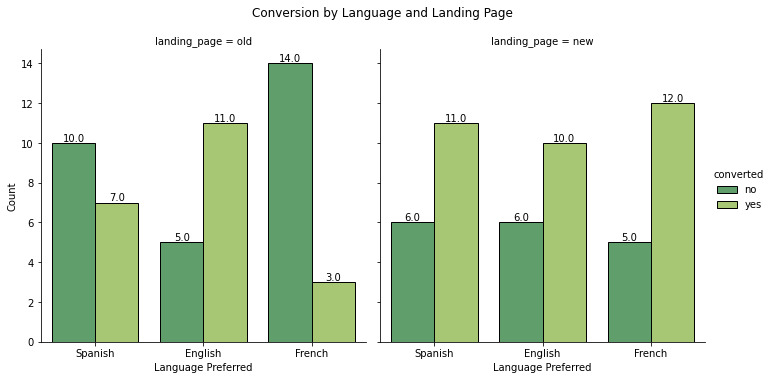

In [ ]:
import matplotlib.pyplot as plt

g = sns.catplot(data=df, x='language_preferred',hue='converted', col='landing_page', kind='count', palette='summer',ci=None,edgecolor='black')

ax1 = g.axes[0][0]
ax2 = g.axes[0][1]

bars = ax1.patches
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom')

bars = ax2.patches
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom')

g.set_xlabels("Language Preferred")
g.set_ylabels("Count")
g.fig.suptitle("Conversion by Language and Landing Page", y=1.05)

plt.show()


**Observations**

Spanish and French users of the new landing page have a high count for their converted status 'yes' compared to users of the old landing page.

English users' count for their converted status 'yes' remains almost equal for both old and new landing pages.

We also observe that the count of users having their conversion status 'yes' is almost the same range for all languages on the new landing page.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

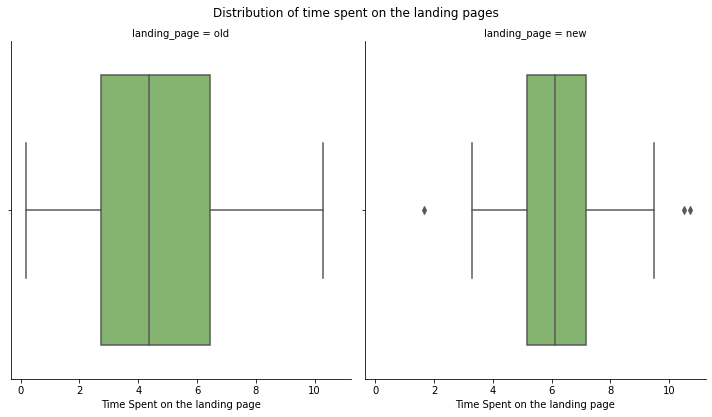

In [ ]:
import matplotlib.pyplot as plt
g = sns.catplot(data=df,x='time_spent_on_the_page',col='landing_page', kind='box', palette='summer',ci=None)
g.fig.set_size_inches(10, 6)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of time spent on the landing pages')
g.set_xlabels('Time Spent on the landing page') 
plt.show()


**Observation**

**Old Landing Page:**  
The box plot of the old landing page indicates the distribution is slightly skewed to the right.

There are no outliers.

The wide box plot of the old page indicates a large spread of data being plotted.

Time spent on the old landing page ranges from 0.19 seconds to 10.3 minutes.

**New Landing Page**

The box plot of the new landing page indicates a normal distribution with data concentrated in a smaller range of values.

We can observe outliers on both ends of the box plot.

Time spent on the new landing page ranges from 1.65 seconds to 10.71 minutes.

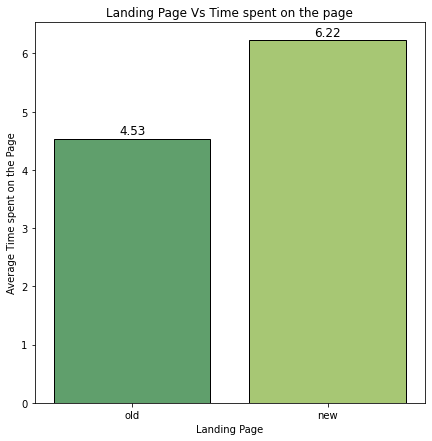

In [ ]:
# visual analysis of the time spent on the landing page from the old version and the new version
plt.figure(figsize=(7,7)) 
bplot=sns.barplot(data=df, x='landing_page', y='time_spent_on_the_page',palette='summer',ci=None)
for bar in bplot.patches:
    bplot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    bar.set_edgecolor('black')
    bar.set_linewidth(1)
plt.title('Landing Page Vs Time spent on the page')
plt.xlabel('Landing Page')
plt.ylabel('Average Time spent on the Page')
plt.show()

**Observations**

The average Time spent on the old page is 4.53 minutes and that of the new page is 6.22 minutes.

The average time spent on the new page is higher than on the old page.

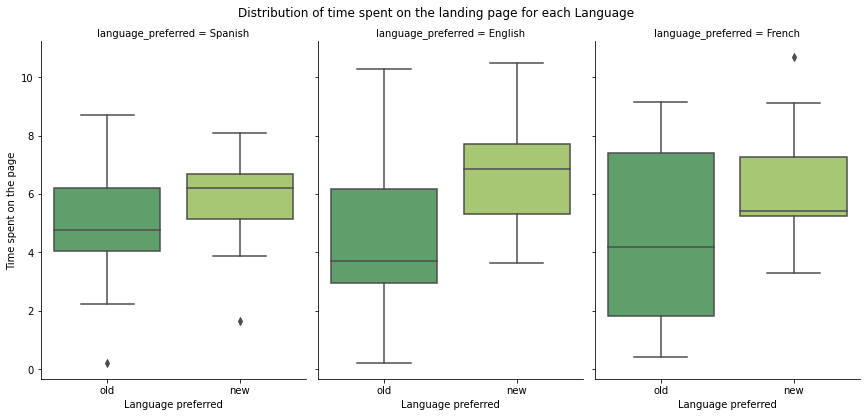

In [ ]:
import matplotlib.pyplot as plt
g = sns.catplot(data=df,x='landing_page',y='time_spent_on_the_page',col='language_preferred',kind='box', palette='summer',ci=None)
g.fig.set_size_inches(12, 6)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of time spent on the landing page for each Language')
g.set_xlabels('Language preferred')
g.set_ylabels('Time spent on the page') 
plt.show()

**Observations**

The mean time spent on the new landing page is higher regardless of the language.

Outliers are spotted for Spanish and French language users.

### Step 1: Define the null and alternate hypotheses:

The null and alternative hypotheses can be formulated as:

>$H_0$: The mean time spent on the new landing page is less than or equal to the mean time spent on the old landing page.

against the alternate hypothesis

>$H_a$: The mean time spent on the new landing page is greater than the mean time spent on the old landing page.

Let  μ1  and  μ2  be the mean time spent on the new landing page and the mean time spent on the old landing page

Mathematically, the above-formulated hypotheses can be written as:

>$H_0$: μ1<=μ2 

against the alternate hypothesis


>$H_a$: μ1>μ2

### Step 2: Select Appropriate test

In [ ]:
#Returns the mean of time spent on different landing pages
print('Mean time spent on the new page : ',round(df.groupby(['landing_page'])['time_spent_on_the_page'].mean()['new'],2))
print('Mean time spent on the old page : ',round(df.groupby(['landing_page'])['time_spent_on_the_page'].mean()['old'],2))
#Returns the standard deviation of time spent on different landing pages
print('Standard deviation of time spent on the new page : ', round(df.groupby(['landing_page'])['time_spent_on_the_page'].std()['new'],2))
print('Standard deviation of time spent on the old page : ', round(df.groupby(['landing_page'])['time_spent_on_the_page'].std()['old'],2))

Mean time spent on the new page :  6.22
Mean time spent on the old page :  4.53
Standard deviation of time spent on the new page :  1.82
Standard deviation of time spent on the old page :  2.58


This is a one-tailed test concerning two population means from two independent populations and the population standard deviation is unknown. Also, the sample mean and sample standard deviations for the time spent on the new and old landing pages are both different. 

A  **Two Independent Sample T-test for Equality of Means - Unequal Standard Deviations** would be the appropriate test to perform.

Let's test whether the T-test assumptions are satisfied or not
*   Continuous data - Yes, the average time spent is measured on a continuous scale.
*  Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
*   Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
*  Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

All Assumptions are satisfied. We can use two sample T-test for this problem.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [ ]:
# create a subset of data frame with time spent  for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create a subset of data frame with time spent for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [ ]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

The p-value (~0.0001) is less than the level of significance (0.05) and we, therefore, reject the null hypothesis.

At a 5% significance level, we conclude that we have enough statistical evidence to say that **users spend more time on the new landing page than on the existing landing page.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

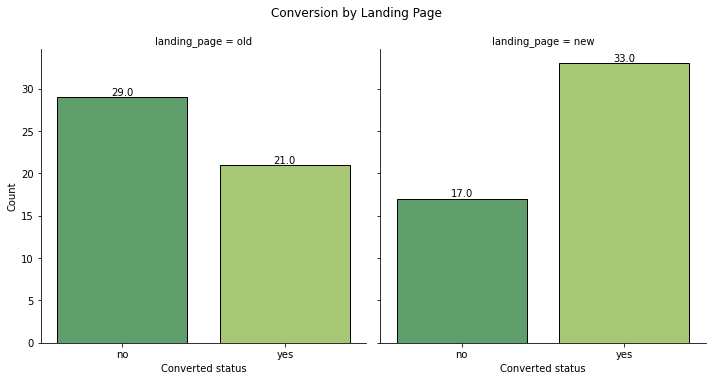

In [ ]:
import matplotlib.pyplot as plt

g = sns.catplot(data=df, x='converted', col='landing_page', kind='count', palette='summer',ci=None,edgecolor='black')

ax1 = g.axes[0][0]
ax2 = g.axes[0][1]

bars = ax1.patches
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom')

bars = ax2.patches
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom')

g.set_xlabels("Converted status")
g.set_ylabels("Count")
g.fig.suptitle("Conversion by Landing Page", y=1.05)

plt.show()


**Observations**

**Old Landing Page:**

21 out of 50 users were converted to subscribers after reading the old landing page.

**New Landing Page:**

33 out of 50 users were converted to subscribers after reading the new landing page.

The proportion of users who visit the landing page and get converted to subscribers seems to be higher for the new landing page than the old landing page.

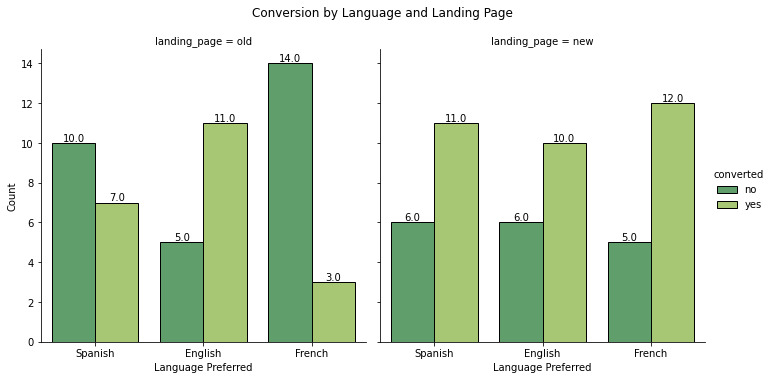

In [ ]:
import matplotlib.pyplot as plt

g = sns.catplot(data=df, x='language_preferred',hue='converted', col='landing_page', kind='count', palette='summer',ci=None,edgecolor='black')

ax1 = g.axes[0][0]
ax2 = g.axes[0][1]

bars = ax1.patches
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom')

bars = ax2.patches
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom')

g.set_xlabels("Language Preferred")
g.set_ylabels("Count")
g.fig.suptitle("Conversion by Language and Landing Page", y=1.05)

plt.show()


**Observations**

The New landing page shows a higher number of visitors who have become subscribers irrespective of the language.

### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:


>$H_0$: The proportion of users visiting the new page and getting converted is less than or equal to the proportion of users visiting the old page and getting converted.

against the alternate hypothesis


>$H_a$: The proportion of users visiting the new page and getting converted is greater than the proportion of users visiting the old page and getting converted.

Let p1, and p2 be the proportions of converters in the new landing page and old landing page respectively.

Mathematically, the above-formulated hypotheses can be written as:

>$H_0$: p1<=p2 

against the alternate hypothesis

>$H_a$: p1>p2


### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations.

A **Two Proportions Z-Test** would be the appropriate test to perform.

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, the user either becomes a subscriber or not.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution be approximated to normal distribution?

The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.

>$
n=50\\
np_1 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-21}{50} =29 \geq 10 \\
np_2 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-33}{50} =17 \geq 10 $

Yes, Binomial distribution can be approximated to normal distribution.

All the assumptions are satisfied, we can use z -test for this problem.


### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [ ]:
# number of converted visitors in New landing page
new_subscribers = df[df['landing_page']=='new']['converted'].value_counts()['yes']

# number of converted visitors in Old landing page
old_subscribers = df[df['landing_page']=='old']['converted'].value_counts()['yes']

print('The numbers of new page visitors who got converted to subscribers and the numbers of old page visitors who got converted to subscribers are {0} and {1} respectively.'.format(new_subscribers, old_subscribers))

# number of visitors in New landing page
n_visitors_newpage = df['landing_page'].value_counts()['new']

# number of visitors in old Landing page
n_visitors_oldpage = df['landing_page'].value_counts()['old']

print('The total numbers of new page visitors and old page visitors are {0} and {1} respectively.'.format(n_visitors_newpage, n_visitors_oldpage))

The numbers of new page visitors who got converted to subscribers and the numbers of old page visitors who got converted to subscribers are 33 and 21 respectively.
The total numbers of new page visitors and old page visitors are 50 and 50 respectively.


In [ ]:
print(f' The proportion of users visiting the new page and getting converted and the proportion of users visiting the old page and getting converted are {round(33/50,2)}, {round(21/50,2)} respectively')

 The proportion of users visiting the new page and getting converted and the proportion of users visiting the old page and getting converted are 0.66, 0.42 respectively


### Step 5: Calculate the p-value

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
z_stat,p_value=proportions_ztest([new_subscribers,old_subscribers],[n_visitors_newpage,n_visitors_oldpage],alternative='larger')
# print the p-value
print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

The p-value (~0.008) is less than the level of significance (0.05) and we, therefore, reject the null hypothesis.

At a 5% significance level, we conclude that we have enough statistical evidence to say that **the proportion of users visiting the new page and getting converted is greater than the proportion of users visiting the old page and getting converted.**

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

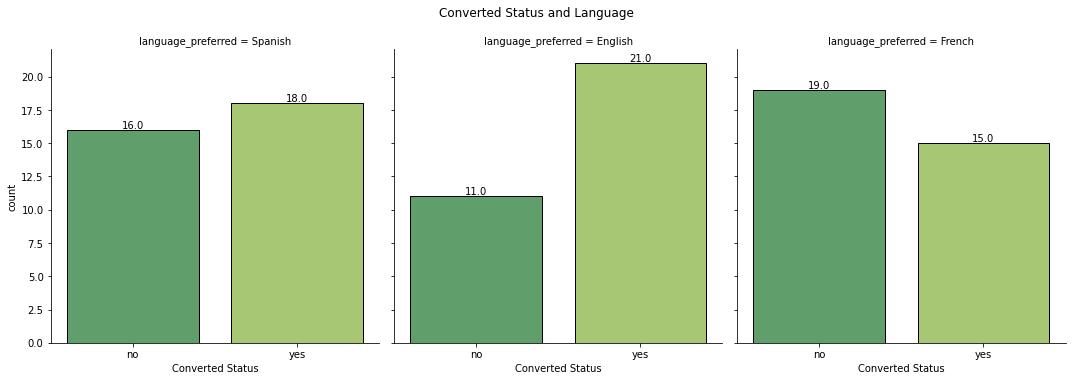

In [ ]:
import matplotlib.pyplot as plt

g = sns.catplot(data=df, x='converted', col='language_preferred', kind='count', palette='summer',ci=None,edgecolor='black')

ax1 = g.axes[0][0]
ax2 = g.axes[0][1]
ax3 = g.axes[0][2]

bars = ax1.patches
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom')

bars = ax2.patches
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom')

bars = ax3.patches
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom')

g.set_xlabels("Converted Status")
g.fig.suptitle("Converted Status and Language", y=1.05)

plt.show()


**Observations**

English has the highest conversion rate followed by Spanish and French.

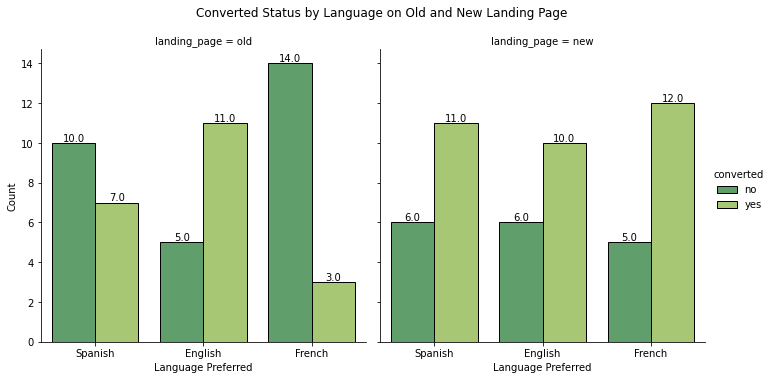

In [ ]:
import matplotlib.pyplot as plt

g = sns.catplot(data=df, x='language_preferred',hue='converted', col='landing_page', kind='count', palette='summer',ci=None,edgecolor='black')

ax1 = g.axes[0][0]
ax2 = g.axes[0][1]

bars = ax1.patches
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom')

bars = ax2.patches
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom')

g.set_xlabels("Language Preferred")
g.set_ylabels("Count")
g.fig.suptitle("Converted Status by Language on Old and New Landing Page", y=1.05)

plt.show()


**Observations**

The ratio of users who got converted to that of users who did not get converted to subscribers after visiting the new landing page is almost the same for all three languages.

There is a significant increase in the conversion rate for Spanish and French users on the new landing page but the conversion rate for English remains almost the same for both pages.


### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:

>$H_0$:  Converted status is independent of language preferred.

>$H_a$:  Converted status is NOT independent of language preferred.


### Step 2: Select Appropriate test

The test is concerned with the relationship of two categorical variables, Converted(Converted to subscribers/Not) and Language preferred.

A **Chi-square test of independence** would be an appropriate test to perform.


### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes
* The expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

All the assumptions are satisfied, we can use the Chi-square test of independence for this problem.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [ ]:
# create the contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['converted'],df['language_preferred'])

# create a styler object and add borders
styled_table = contingency_table.style.set_properties(**{'border': '1px solid black', 'text-align': 'center'}).set_table_styles([{'selector': 'th', 'props': [('border', '1px solid black')]}])
# display the table
styled_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


We have created a two-by-two contingency table, with the counts of 'Converted' (Yes or No) in the rows and the counts of 'Language Preferred' in the columns.

### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import chi2_contingency
# use chi2_contingency() to find the p-value
chi2, pval, dof, exp_freq = chi2_contingency(contingency_table)
# print the p-value
print('The p-value is', pval)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

The p-value (~0.212) is greater than the level of significance (0.05) and we, therefore, fail to reject the null hypothesis.

At a 5% significance level, we conclude that we have enough statistical evidence to say that the **converted status is independent of the language preferred.**

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [ ]:
#Returns the unique count for different languages
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

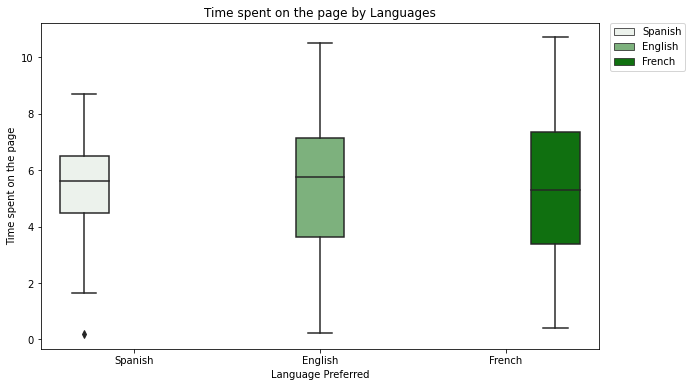

In [ ]:
# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (10,6))
a = sns.boxplot(x= 'language_preferred', y = 'time_spent_on_the_page' , data = df, hue = 'language_preferred',color='green')
a.set_title('Time spent on the page by Languages')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Language Preferred')
plt.ylabel('Time spent on the page')
plt.show()

**Observations**

Oultiers are spotted for Spanish.

The average time spent on the landing page is almost equal for all three languages.


In [ ]:
# Returns the mean of time spent on landing pages for different languages
print(df.groupby('language_preferred')['time_spent_on_the_page'].mean())

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64


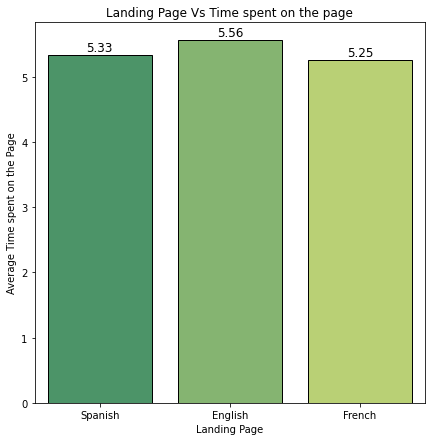

In [ ]:
# visual analysis of the time spent on the landing page from the old version and the new version
plt.figure(figsize=(7,7)) 
bplot=sns.barplot(data=df, x='language_preferred', y='time_spent_on_the_page',palette='summer',ci=None)
for bar in bplot.patches:
    bplot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    bar.set_edgecolor('black')
    bar.set_linewidth(1)
plt.title('Landing Page Vs Time spent on the page')
plt.xlabel('Landing Page')
plt.ylabel('Average Time spent on the Page')
plt.show()

**Observations**

The average time spent on the landing pages is almost equal for all three languages.

In [ ]:
#Returns the average time spent on new landing page for different languages.
df.loc[df['landing_page'] == 'old'].groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    4.454375
French     4.310000
Spanish    4.828235
Name: time_spent_on_the_page, dtype: float64

In [ ]:
#Returns the average time spent on old landing page for different languages.
df.loc[df['landing_page'] == 'new'].groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

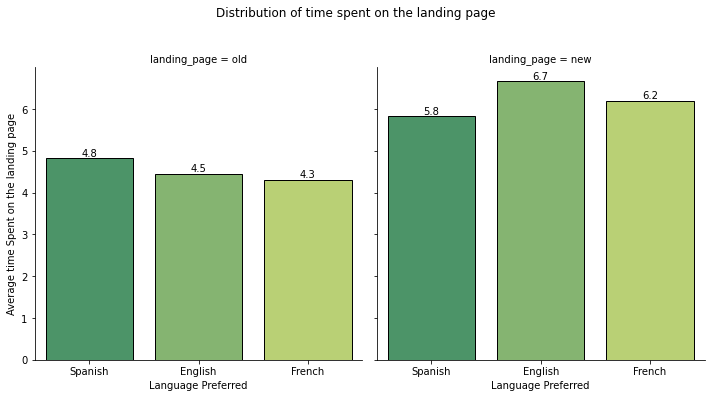

In [ ]:
import matplotlib.pyplot as plt

g = sns.catplot(data=df,x='language_preferred', y = 'time_spent_on_the_page',col='landing_page', kind='bar', palette='summer',ci=None,edgecolor='black')

ax1 = g.axes[0][0]
ax2 = g.axes[0][1]

bars = ax1.patches
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom')

bars = ax2.patches
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom')
g.fig.suptitle('Distribution of time spent on the landing page',y=1.1)
g.set_xlabels('Language Preferred') 
g.set_ylabels('Average time Spent on the landing page')
plt.show()


**Observations**

**Old Page:**

The average time spent on the old landing page for all three languages is almost equal.

**New Page:**

The average time spent on the new landing page for all three languages is also quite close to one another.


### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:

>$H_0$: The mean time spent on the new landing page for all three languages are all equal.

against the alternate hypothesis


>$H_a$: The mean time spent on the new landing page for at least one of the three languages is different.

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new landing page for language preferences Spanish, French, and English respectively.

Mathematically, the above-formulated hypotheses can be written as:

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one-time average of the new landing page is different among the language preferences.



### Step 2: Select Appropriate test

The test is concerned with comparing the means of more than two groups.

A **One-way ANOVA F-test** would be an appropriate test to perform.


### Let's test whether the assumptions are satisfied or not

* Normality: The dependent variable should be normally distributed within each group.

*  Independence: The observations should be independent and not related to each other.

*  Equal variances: The variances of the dependent variable should be equal across all groups.

If the assumptions are met, ANOVA can be used to test the null hypothesis.


### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

### Normality - Shapiro-Wilk’s test

We will test the null hypothesis
>$H_0:$ Time spent on the landing page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the landing page does not follow a normal distribution


The [`shapiro()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) function of Scipy will be used to compute the test statistic and p-value.

In [ ]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
statistic, p_value  = stats.shapiro(df[df['landing_page']=='new']['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


The p-value (~0.804) is greater than the level of significance (0.05) and we, therefore, fail to reject the null hypothesis.

At a 5% significance level, we conclude that time spent on the landing page follows a normal distribution.

### Equality - Levene’s test

We will test the null hypothesis

>$H_0$ : All the population variances are equal

against the alternative hypothesis

>$H_a$ : At least one variance is different from the rest

The [`levene()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) function of Scipy will be used to compute the test statistic and p-value.

In [ ]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene(       df[(df['landing_page'] == 'new') & (df['language_preferred'] == 'Spanish')]['time_spent_on_the_page'], 
                                   df[(df['landing_page'] == 'new') & (df['language_preferred'] == 'French')]['time_spent_on_the_page'], 
                                   df[(df['landing_page'] == 'new') & (df['language_preferred'] == 'English')]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


The p-value (~0.46) is greater than the level of significance (0.05) and we, therefore, fail to reject the null hypothesis.

At a 5% significance level, we conclude that variances of all the variables are equal.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using Levene's test.

All our assumptions are satisfied. We can use One-way ANOVA F-test for this problem.


The [`f_oneway()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) function of Scipy will be used to compute the test statistic and p-value.

### Step 5: Calculate the p-value

In [ ]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df[(df['landing_page'] == 'new') & (df['language_preferred'] == 'Spanish')]['time_spent_on_the_page'],
                              df[(df['landing_page'] == 'new') & (df['language_preferred'] == 'French')]['time_spent_on_the_page'],
                              df[(df['landing_page'] == 'new') & (df['language_preferred'] == 'English')]['time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

The p-value (~0.43) is greater than the level of significance (0.05) and we, therefore, fail to reject the null hypothesis.

At a 5% significance level, we conclude that **the mean time spent on the new landing page for all  three languages are all equal.**

The Turkey HSD (honest significant difference) test is a post-hoc test that can be performed after a significant result is obtained from an ANOVA (analysis of variance) test. The purpose of the test is to determine which specific groups differ significantly from one another, and it assumes that the null hypothesis of the ANOVA (that all means are equal) has been rejected.

Since the results of the one-way ANOVA test do not provide evidence that the means are not equal (i.e., the null hypothesis of the ANOVA is not rejected), it does not make sense to proceed with the Turkey HSD test. 

## Conclusion and Business Recommendations

**Observations**

The following conclusions are made from the Visual Analysis and Statistical Hypothesis Testing.

The average time spent on the landing page and the user's language preference on reading the landing page is the possible factors influencing the page's visitors to become subscribers.

The mean time spent on the new landing page is higher than the old one, regardless of the language preferred by the user.

The proportion of users who visit the landing page and get converted to subscribers is higher for the new landing page than the old landing page.

There is a significant increase in the conversion rate for Spanish and French users on the new landing page, but the conversion rate for English remains almost the same for both pages.

The converted status does not depend on the language the users prefer, thus making the average time spent on the landing page a deciding factor for increasing the converted status.

The average time spent on the new landing page for all three languages is equal.

**Conclusion**

Launching the new landing page will expand Business and acquire new Subscribers for its online news portal.

Time spent on the landing page influences the chances of a visitor becoming a subscriber.

Language preference does not influence the conversion rate.

**Recommendations**

It is important for the visitors reading the page to spend a reasonable amount of time and consider the information we provide valuable.  

Some of the recommendations to increase the average time spent on the page and thereby encourage the visitors to become subscribers are to keep the page's contents short and precise, add good quality images, and maintain the suitable font sizes of the content.

We can also analyze a few of the most preferred languages globally and make the landing pages available for the users to increase the number of visitors to the new portal, thereby increasing the chances of new subscribers.

___